In [ ]:
!pip install ultralytics

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

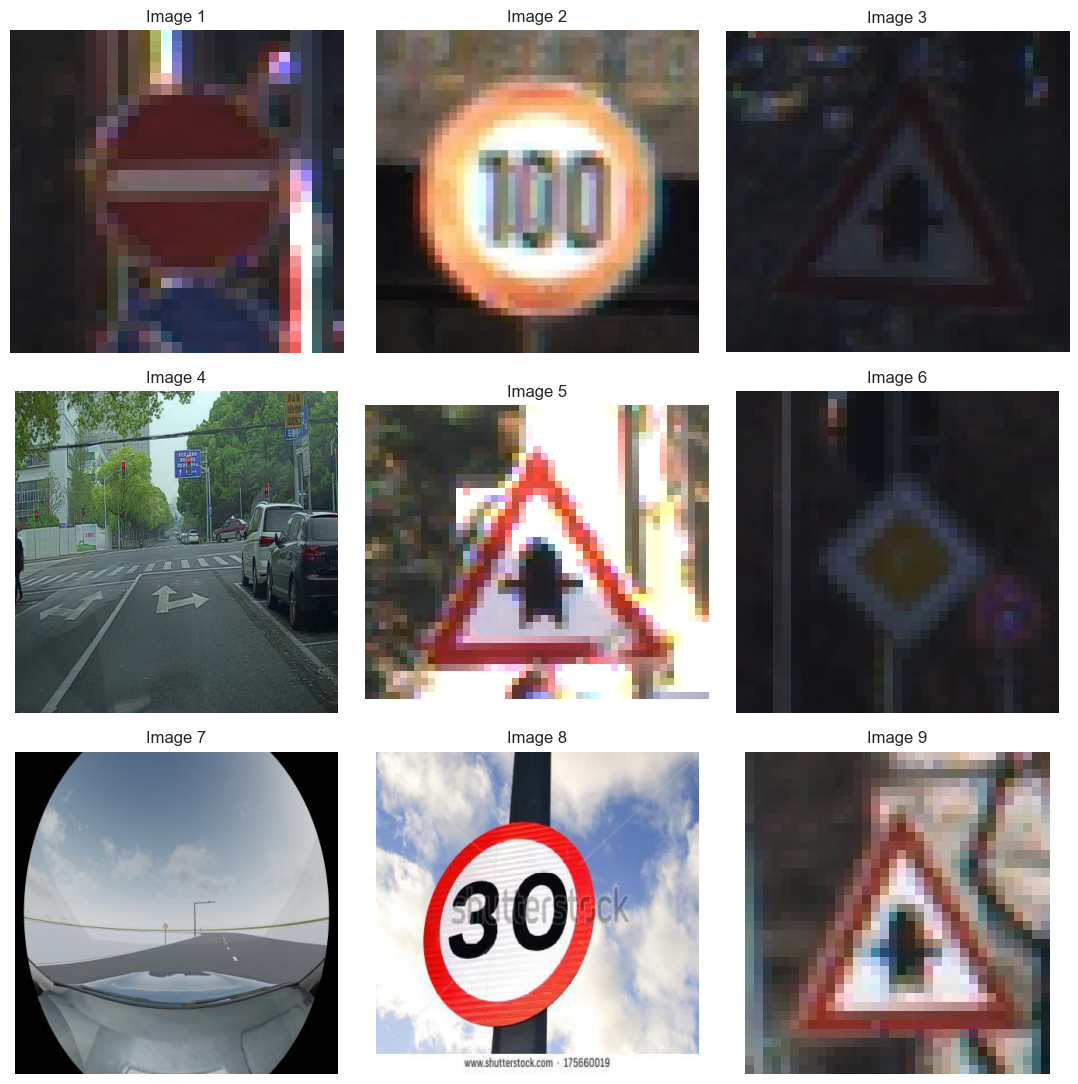

In [6]:
Image_dir = 'C:/Users/salim/Desktop/python-kodlari/trafik_algila/dataset-test/train/images/'

num_samples = 9
image_files = os.listdir(Image_dir)


rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:

image = cv2.imread("C:/Users/salim/Desktop/python-kodlari/trafik_algila/dataset-test/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 C:\Users\salim\Desktop\python-kodlari\trafik_algila\dataset-test\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 153.3ms
Speed: 13.2ms preprocess, 153.3ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)


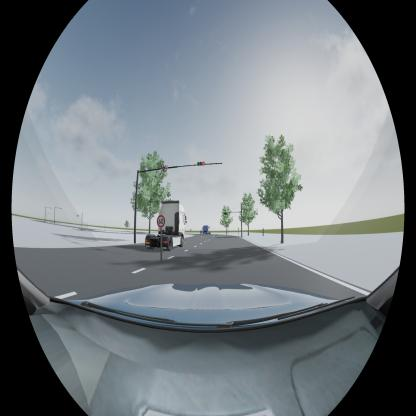

In [12]:
model = YOLO("yolov8n.pt") 


image = "C:/Users/salim/Desktop/python-kodlari/trafik_algila/dataset-test/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))


plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/trafik-isaret/dataset-test/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()


image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]


post_training_files_path = '/runs/detect/train2'


display_images(post_training_files_path, image_files)

In [ ]:

Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


metrics = Valid_model.val(split = 'val')


print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])


0: 640x640 1 Speed Limit 30, 353.5ms
Speed: 3.8ms preprocess, 353.5ms inference, 10.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 51.0ms
Speed: 2.4ms preprocess, 51.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 53.7ms
Speed: 2.1ms preprocess, 53.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 52.6ms
Speed: 2.2ms preprocess, 52.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 53.2ms
Speed: 2.2ms preprocess, 53.2ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 51.3ms
Speed: 2.3ms preprocess, 51.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 48.9ms
Speed: 2.2ms preprocess, 48.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 1 Red Light, 51.2ms
Speed: 2.2ms preprocess, 51.

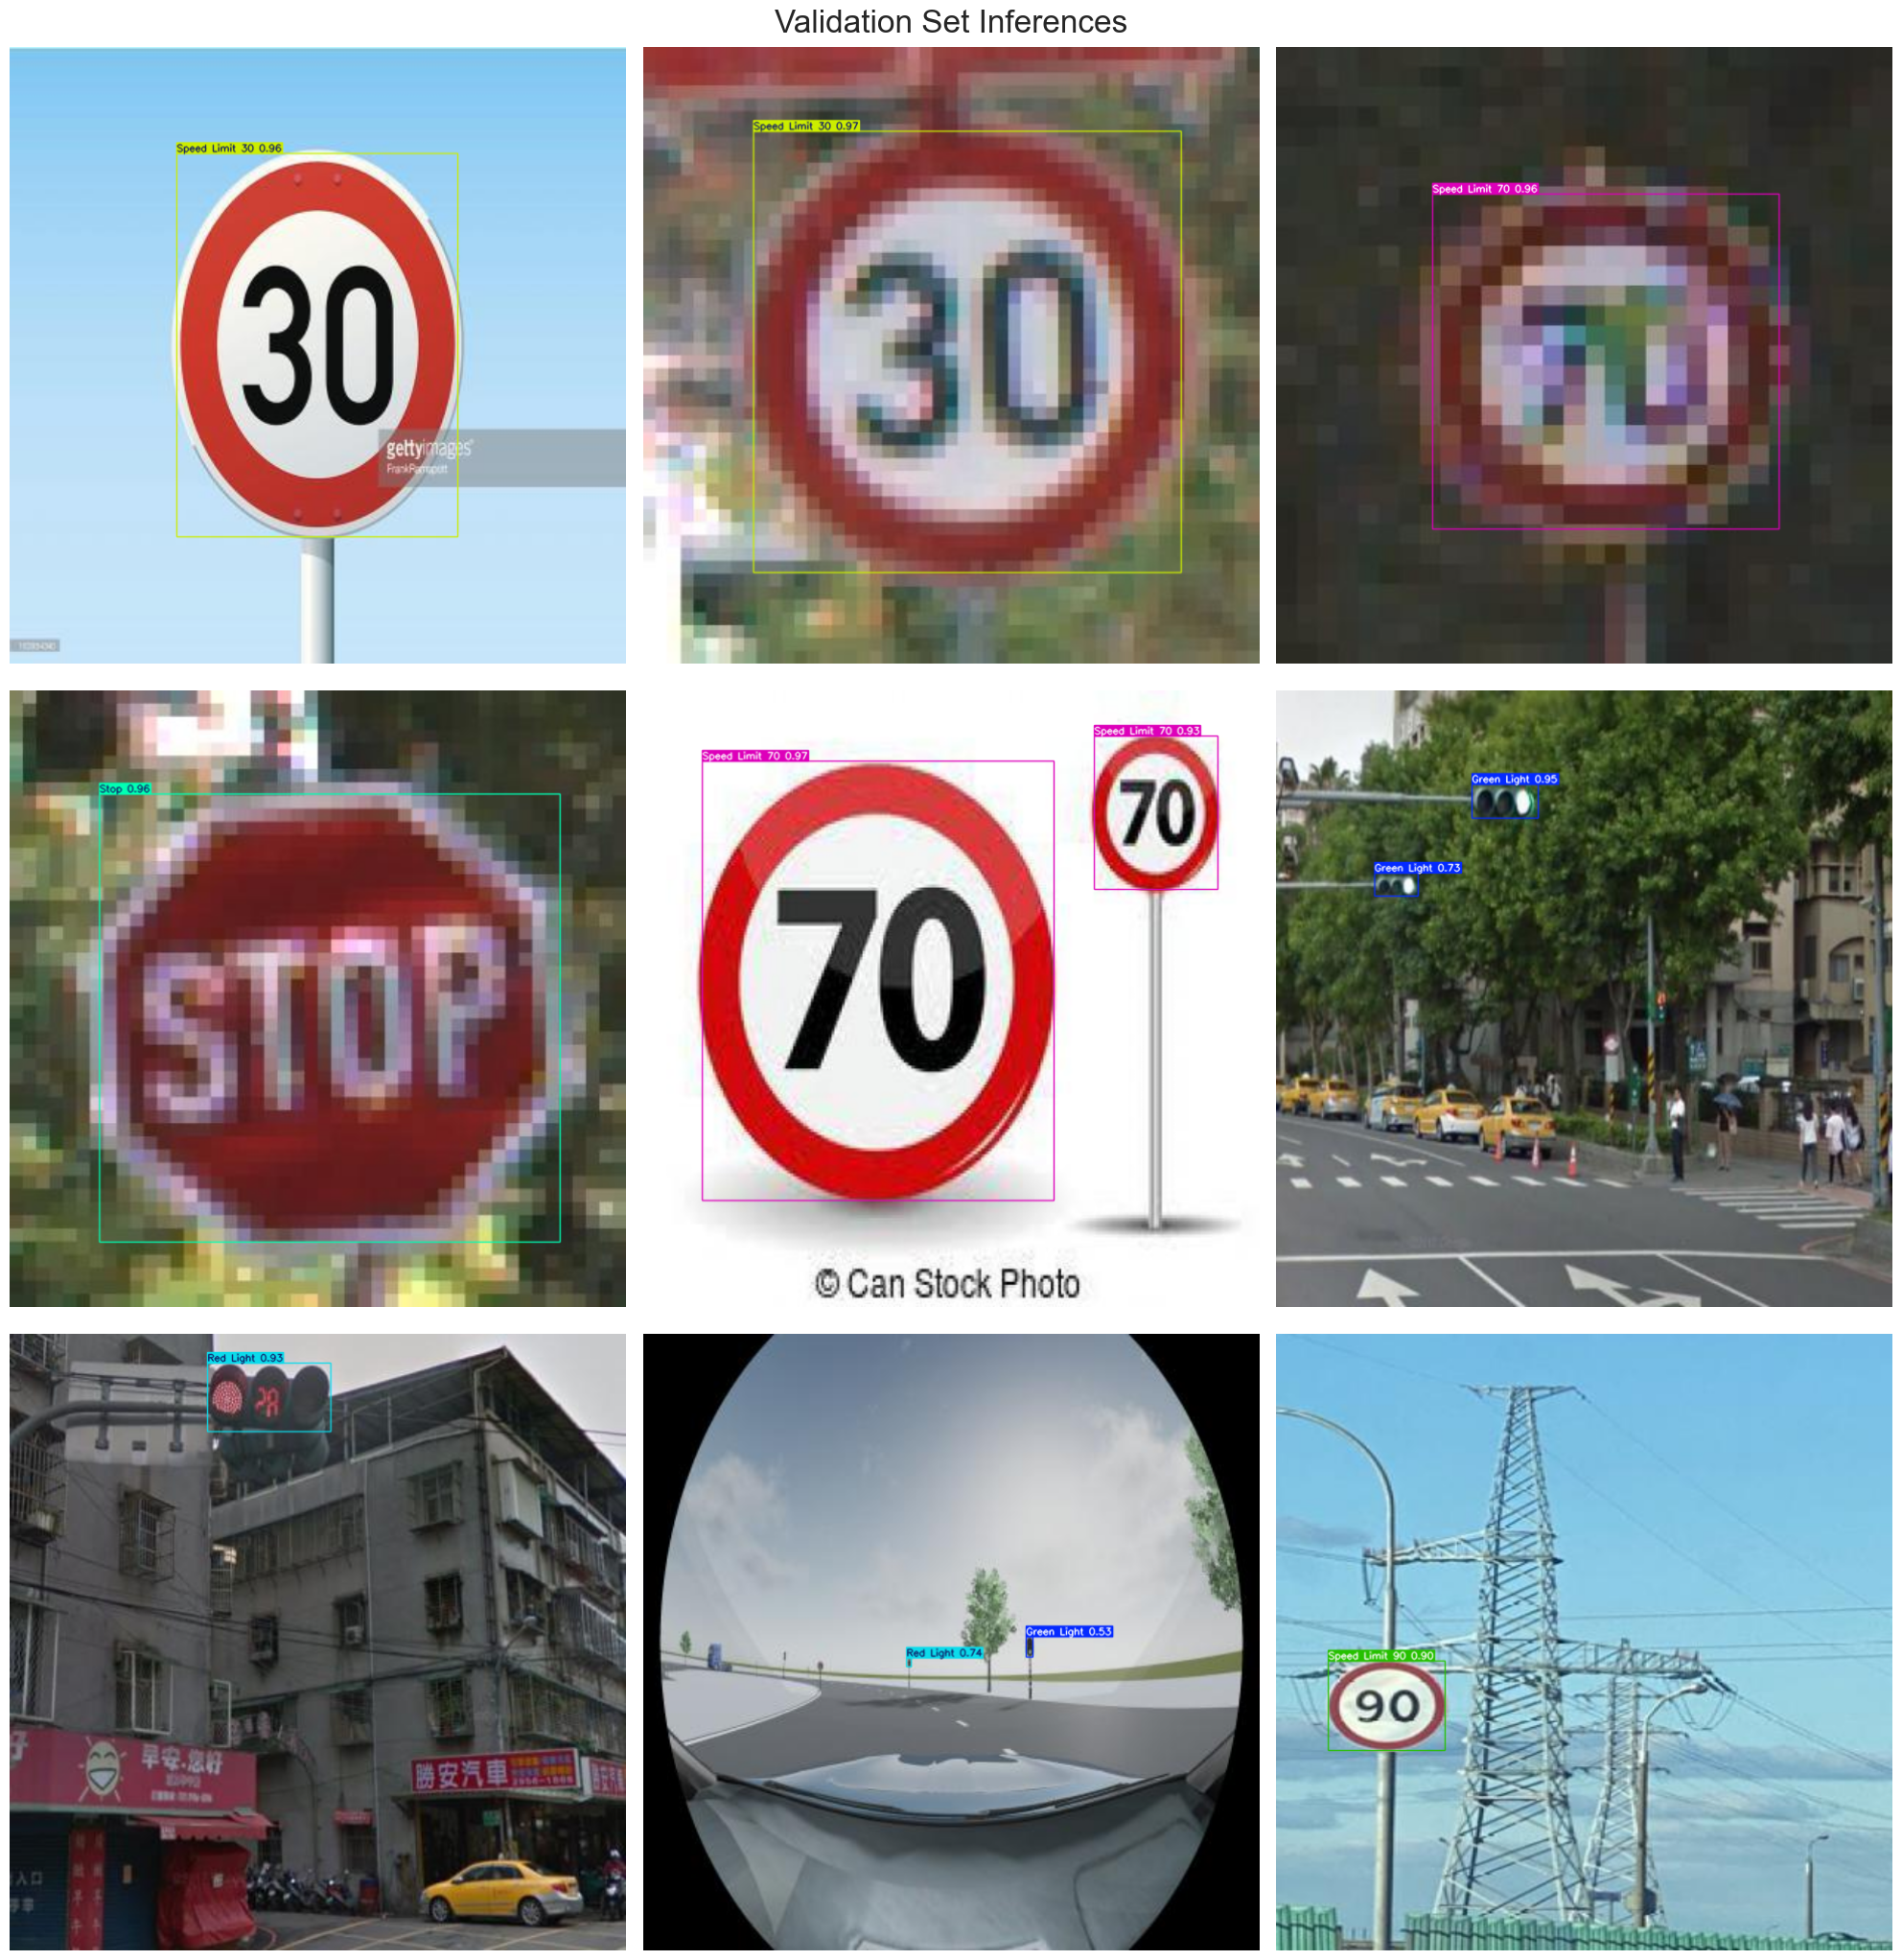

In [30]:

def normalize_image(image):
    return image / 255.0


def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)


dataset_path = 'C:/Users/salim/Desktop/python-kodlari/trafik_algila/dataset-test'  
valid_images_path = os.path.join(dataset_path, 'test', 'images')


image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]


if len(image_files) > 0:
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

  
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            

            image = cv2.imread(image_path)
            
          
            if image is not None:
          
                resized_image = resize_image(image, size=(640, 640))
         
                normalized_image = normalize_image(resized_image)
        
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
  
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
  
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()